In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime

## 商品推薦

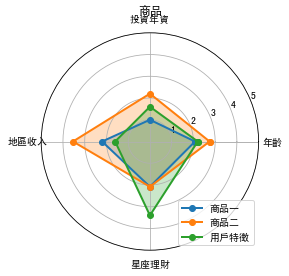

In [2]:
# 雷達圖
# 投資年紀、本身年紀、星座、稅收

# 示意數據
values = [2.075, 1, 2.2, 2.08]
values2 = [2.745, 2.2, 3.54, 2.08]
user_features = [2.2, 1.6, 1.6, 3.4]
feature = ["年齡", "投資年資", "地區收入", "星座理財"]

N = len(values)
# 設置雷達圖的角度，用於平分切開一個圓面
angles=np.linspace(0, 2*np.pi, N, endpoint=False)

# 為了使雷達圖一圈封閉起來，須將起點終點設為同一個
values=np.concatenate((values,[values[0]]))
values2 = np.concatenate((values2,[values2[0]]))
values3 = np.concatenate((user_features,[user_features[0]]))
angles=np.concatenate((angles,[angles[0]]))

# 繪圖
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)

# 繪製折線圖
ax.plot(angles, values, 'o-', linewidth=2, label = "商品一")
# 填色
ax.fill(angles, values, alpha=0.25)

# 商品二
ax.plot(angles, values2, 'o-', linewidth=2, label = '商品二')
ax.fill(angles, values2, alpha=0.25)
# 申請者特性
ax.plot(angles, values3, 'o-', linewidth=2, label = '用戶特徵')
ax.fill(angles, values3, alpha=0.25)

# 添加每個特徵的標籤
ax.set_thetagrids(angles * 180/np.pi, feature)
# 雷達圖範圍刻度
ax.set_ylim(0, 5)
# 標題
plt.title('商品')
# 添加網格縣
ax.grid(True)
# 右下標籤
plt.legend(loc='lower right')
# 顯示圖形
plt.show()

In [21]:
# 計算稅收point
def get_tax_point(tax):
    # max_tax is magic number...
    max_tax = 130000
    min_tax = 29157
    
    if tax > max_tax:
        return 5
    elif tax < min_tax:
        return 0
    else:
        scale = 5/(max_tax - min_tax)
        convert = ((tax - min_tax) * scale)
        return round(convert, 2)
    
# 計算年紀
def calculate_age(born):
    today = datetime.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# 計算年紀point
def get_age_point(age):
    max_age = 100
    min_age = 0
    
    if age > max_age:
        return 5
    elif age < min_age:
        return 0
    else:
        scale = 5/(max_age - min_age)
        convert = ((age - min_age) * scale)
        return round(convert, 2)

# age分群
def age_group(x):
    if x<=20:
        return "20↓" 
    elif x>20 and x<=30:
        return "20-30" 
    elif x>30 and x<=40:
        return "30-40" 
    elif x>40 and x<=50:
        return "40-50"
    elif x>50 and x<=60:
        return "50-60" 
    elif x>60:
        return "60↑"

# area分類
def city_group(x):
    if x =="None":
        return "None"
    
    city = {
        "North":["台北市", "新北市", "基隆市", "新竹市", "桃園市", "新竹縣"],
        "Center":["台中市", "苗栗縣", "彰化縣", "南投縣", "雲林縣"],
        "South":["高雄市", "台南市", "嘉義市", "嘉義縣", "屏東縣"],
        "East":["宜蘭縣", "花蓮縣", "台東縣"],
        "Offshore_islands":["金門縣", "澎湖縣"]
    }
    
    for area in city:
        if x in city[area]:
            return area

In [22]:
# 生日/性別/城市/繳稅額/投資年資
birth_date = datetime.strptime(input("birth date(yyyy/mm/dd): "), "%Y/%m/%d")
gender = input("female/male: ")
city = input("city: ")
tax = int(input("tax_paid: "))
seniority = int(input("years of investment:" ))

#convert for product match
age = calculate_age(birth_date)
age_point = get_age_point(age)
tax_point = get_tax_point(tax)
seniority = seniority/10

# convert for sales match
age_range = age_group(age)
area = "area_" + city_group(city)
location = "location_" + city
applicant = {"age": age_range, "gender": gender, "area": area, "location": location}

birth date(yyyy/mm/dd): 1994/09/04
female/male: female
city: 桃園市
tax_paid: 40000
years of investment:2


In [23]:
# two norm
# 因星座兩項商品相同，因此省略計算
def recommend_product(user_feature):
    onshore = [2.075, 1, 2.2]
    offshore = [2.745, 2.2, 3.54]
    
    on_variance = []
    off_variance = []

    print(user_feature)
    
    for i in range(3):
        on_var = (onshore[i] - user_feature[i]) ** 2
        on_variance.append(on_var)
        off_var = (offshore[i] - user_feature[i]) ** 2
        off_variance.append(off_var)
        
    print(on_variance)
    print(off_variance)
    
    on_similarity = sum(on_variance)
    off_similarity2 = sum(off_variance)
    
    print(on_similarity)
    print(off_similarity2)

    return "Onshore" if on_similarity < off_similarity2 else "Offshore"

[1.2, 0.2, 0.54]


In [24]:
# "年齡", "投資年資", "稅收入"
user = [age_point, seniority, tax_point]
product = recommend_product(user)
print(product)

[1.2, 0.2, 0.54]
[0.7656250000000003, 0.6400000000000001, 2.7556000000000003]
[2.3870250000000004, 4.0, 9.0]
4.161225000000001
15.387025000000001
Onshore


## 業務推薦

In [25]:
# read data
df = pd.read_csv('../data/{}.csv'.format(product))

# add the number of customers
df["customer_num"] = df['female'] + df['male']

# add recommended score
df["score"] = 0

In [26]:
df

,sales,female,male,20↓,20-30,30-40,40-50,50-60,60↑,highyielddebtriskforecast: N,...,location_嘉義市,location_嘉義縣,location_屏東縣,location_宜蘭縣,location_花蓮縣,location_台東縣,location_金門縣,location_澎湖縣,customer_num,score
0,311710,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,A000159078,2,6,4,2,0,2,0,0,8,...,0,0,0,0,0,0,0,0,8,0
2,A0278,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,A0288,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,A0367,0,3,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0
5,A0431,8,4,2,3,2,1,3,1,10,...,0,0,0,0,0,0,0,0,12,0
6,A0460,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,A0524,11,3,0,2,3,5,3,1,11,...,1,0,1,0,0,0,0,0,14,0
8,A0532,2,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
9,A0639,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
dic = df.to_dict(orient='records')
dic

[{'sales': '311710',
  'female': 1,
  'male': 0,
  '20↓': 0,
  '20-30': 0,
  '30-40': 0,
  '40-50': 1,
  '50-60': 0,
  '60↑': 0,
  'highyielddebtriskforecast: N': 1,
  'highyielddebtriskforecast: Y': 0,
  'area_Center': 0,
  'area_East': 0,
  'area_North': 1,
  'area_South': 0,
  'location_台北市': 0,
  'location_新北市': 1,
  'location_基隆市': 0,
  'location_新竹市': 0,
  'location_桃園市': 0,
  'location_新竹縣': 0,
  'location_台中市': 0,
  'location_苗栗縣': 0,
  'location_彰化縣': 0,
  'location_南投縣': 0,
  'location_雲林縣': 0,
  'location_高雄市': 0,
  'location_台南市': 0,
  'location_嘉義市': 0,
  'location_嘉義縣': 0,
  'location_屏東縣': 0,
  'location_宜蘭縣': 0,
  'location_花蓮縣': 0,
  'location_台東縣': 0,
  'location_金門縣': 0,
  'location_澎湖縣': 0,
  'customer_num': 1,
  'score': 0},
 {'sales': 'A000159078',
  'female': 2,
  'male': 6,
  '20↓': 4,
  '20-30': 2,
  '30-40': 0,
  '40-50': 2,
  '50-60': 0,
  '60↑': 0,
  'highyielddebtriskforecast: N': 8,
  'highyielddebtriskforecast: Y': 0,
  'area_Center': 0,
  'area_East': 0,

In [28]:
def recommend_sales(applicant):
    
    print("---------filter by area-----------")
    data_filter_area = []
    for data in dic:
        if data[applicant["area"]] > 0:
            print(data["sales"])
            data_filter_area.append(data)
    
    print("---------filter by age-----------")
    data_filter_age = []
    for data in data_filter_area:
        if data[applicant["age"]] > 0:
            data["score"] += data[applicant["age"]] / data["customer_num"]
            print(data["sales"], data["score"])
            data_filter_age.append(data)
            
    print("---------filter by gender-----------")
    data_filter_gender = []
    for data in data_filter_age:
        if data[applicant["gender"]] > 0:
            data["score"] += (data[applicant["gender"]] / data["customer_num"] * 0.8)
            print(data["sales"], data["score"])
            data_filter_gender.append(data)
            
    print("---------filter by location-----------")
    data_filter_loc = []
    for data in data_filter_age:
        if data[applicant["location"]] > 0:
            data["score"] += (data[applicant["location"]] / data["customer_num"] * 0.6)
            print(data["sales"], data["score"])
            data_filter_loc.append(data)
            
    if len(data_filter_loc) > 0:
        return get_best_sales(data_filter_loc)
    elif len(data_filter_gender) > 0:
        return get_best_sales(data_filter_gender)
    elif len(data_filter_age) > 0:
        return get_best_sales(data_filter_age)
    else:
        return get_best_sales(data_filter_area)
        
def get_best_sales(sales):
    
    if len(sales) > 0:
        best_score = 0
        best_sales_index = 0
        for i in range(len(sales)):
            if sales[i]["score"] > best_score:
                best_score = sales[i]["score"]
                best_sales_index = i

        return sales[best_sales_index]["sales"]
    else:
        return "no recommendation"


In [29]:
best_one = recommend_sales(applicant)

---------filter by area-----------
311710
A000159078
A0278
A0431
A0460
A0524
A0532
A0700
A0769
A0780
C000467580
H000141315
J000725232
L000523853
LF00000001
RCAM1
---------filter by age-----------
A000159078 0.25
A0431 0.25
A0524 0.14285714285714285
A0700 0.5
A0769 0.16666666666666666
H000141315 1.0
LF00000001 1.0
---------filter by gender-----------
A000159078 0.45
A0431 0.7833333333333333
A0524 0.7714285714285714
A0700 0.9
A0769 0.6666666666666666
---------filter by location-----------
A0431 0.8333333333333334
A0524 0.8142857142857142
A0769 0.7666666666666666
H000141315 1.6


In [30]:
best_one

'H000141315'